# <p style="text-align: center;"><u>Image Classification</u></p>

---
## Importing libraries
---

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

import itertools

---
## Load CIFAR-10 data 
- ### Using only 5 categories from 10. 
- ### Using these categories : ['airplane', 'bird', 'cat', 'deer', 'ship']
---

In [32]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [33]:
classes_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes_indices = [0, 2, 3, 4, 8]

In [34]:
indices_train = np.where((y_train == classes_indices[0]) |
                         (y_train == classes_indices[1]) |
                         (y_train == classes_indices[2]) |
                         (y_train == classes_indices[3]) |
                         (y_train == classes_indices[4]))[0]

In [35]:
indices_test = np.where((y_test == classes_indices[0]) |
                        (y_test == classes_indices[1]) |
                        (y_test == classes_indices[2]) |
                        (y_test == classes_indices[3]) |
                        (y_test == classes_indices[4]))[0]

In [6]:
indices_train

array([    3,     6,     8, ..., 49992, 49994, 49995], dtype=int64)

# Categorizing to have sequential labels for the extracted classes 

In [36]:
new_X_train = X_train[indices_train]
new_y_train = y_train[indices_train]

uniqueValues, occurCount = np.unique(new_y_train, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 2 3 4 8]
Occurrence Count :  [5000 5000 5000 5000 5000]


In [37]:
new_y_train_mapped = new_y_train
new_y_train_mapped[new_y_train_mapped==2] = 1
new_y_train_mapped[new_y_train_mapped==3] = 2
new_y_train_mapped[new_y_train_mapped==4] = 3
new_y_train_mapped[new_y_train_mapped==8] = 4

uniqueValues, occurCount = np.unique(new_y_train_mapped, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1 2 3 4]
Occurrence Count :  [5000 5000 5000 5000 5000]


In [38]:
new_X_test = X_test[indices_test]
new_y_test = y_test[indices_test]

In [39]:
new_y_test_mapped = new_y_test
new_y_test_mapped[new_y_test_mapped==2] = 1
new_y_test_mapped[new_y_test_mapped==3] = 2
new_y_test_mapped[new_y_test_mapped==4] = 3
new_y_test_mapped[new_y_test_mapped==8] = 4

uniqueValues, occurCount = np.unique(new_y_test_mapped, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1 2 3 4]
Occurrence Count :  [1000 1000 1000 1000 1000]


In [11]:
print ('Training Data Shape\n\n----------------------\n')
print ('X_train',X_train.shape,'\n')
print ('X_train for 5 categories',new_X_train.shape,'\n\n----------------------\n')
print ('Y_train',y_train.shape,'\n')
print ('Y_train for 5 categories',new_y_train.shape,'\n\n----------------------\n')

print ('Testing Data Shape\n\n----------------------\n')
print ('X_test',X_test.shape,'\n')
print ('X_test for 5 categories',new_X_test.shape,'\n\n----------------------\n')
print ('Y_test',y_test.shape,'\n')
print ('Y_test for 5 categories',new_y_test.shape,'\n')

Training Data Shape

----------------------

X_train (50000, 32, 32, 3) 

X_train for 5 categories (25000, 32, 32, 3) 

----------------------

Y_train (50000, 1) 

Y_train for 5 categories (25000, 1) 

----------------------

Testing Data Shape

----------------------

X_test (10000, 32, 32, 3) 

X_test for 5 categories (5000, 32, 32, 3) 

----------------------

Y_test (10000, 1) 

Y_test for 5 categories (5000, 1) 



# Plot the traning set from the extracted classes with appropriate labels

C:\Users\charu\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


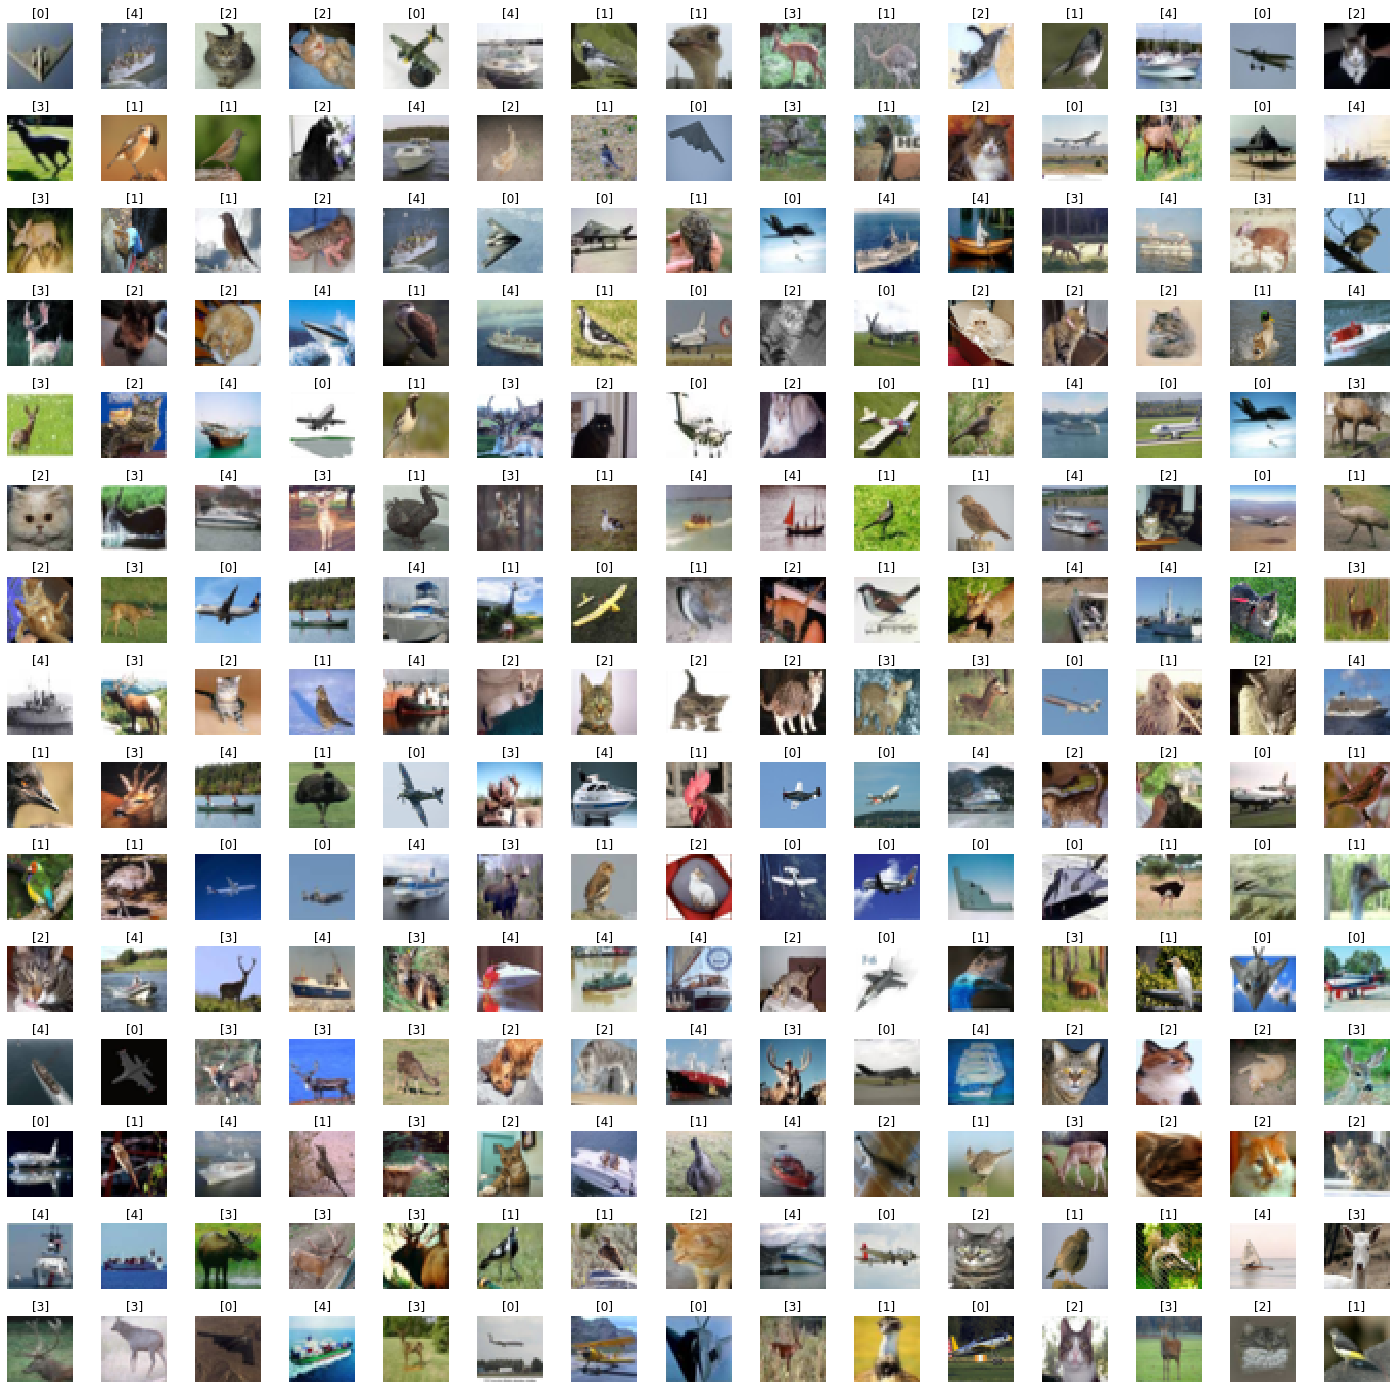

In [12]:
fig,axes = plt.subplots(15,15,figsize=(25,25))
axes=axes.ravel()
n_training=len(new_X_train)

for i in np.arange(0,15 * 15):
    index=np.random.randint(0,n_training) #Pick a random number 
    axes[i].imshow(new_X_train[index])
    axes[i].set_title(new_y_train_mapped[index]) #Prints labels on top of the picture
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
plt.show()

---
## Normalize X values and convert categorical vector to binary matrix
---

In [40]:
new_X_train = new_X_train.astype('float32')
new_X_test = new_X_test.astype('float32')
new_X_train = new_X_train/255
new_X_test = new_X_test/255

In [41]:
new_y_train_categorized = to_categorical(new_y_train_mapped,5)
new_y_test_categorized = to_categorical(new_y_test_mapped,5)

---
## Split dataset into 80% for train and 20% for validation
---

In [42]:
X_train_split, X_validation, y_train_split, y_validation = train_test_split(new_X_train,new_y_train_categorized, test_size=0.20, shuffle= True)

In [16]:
print ('Training Data Shape\n\n----------------------\n')
print ('X_train',X_train.shape,'\n')
print ('X_train for 5 categories',new_X_train.shape,'\n')
print ('Split X_train for 5 categories',X_train_split.shape,'\n\n----------------------\n')
print ('Y_train',y_train.shape,'\n')
print ('Y_train for 5 categories',new_y_train_categorized.shape,'\n')
print ('Split Y_train for 5 categories',y_train_split.shape,'\n\n----------------------\n')

print ('Validation Data Shape\n\n----------------------\n')
print ('Validation X_train for 5 categories',X_validation.shape,'\n')
print ('Validaiton Y_train for 5 categories',y_validation.shape,'\n\n----------------------\n')

print ('Testing Data Shape\n\n----------------------\n')
print ('X_test',X_test.shape,'\n')
print ('X_test for 5 categories',new_X_test.shape,'\n\n----------------------\n')
print ('Y_test',y_test.shape,'\n')
print ('Y_test for 5 categories',new_y_test_categorized.shape,'\n')

Training Data Shape

----------------------

X_train (50000, 32, 32, 3) 

X_train for 5 categories (25000, 32, 32, 3) 

Split X_train for 5 categories (20000, 32, 32, 3) 

----------------------

Y_train (50000, 1) 

Y_train for 5 categories (25000, 5) 

Split Y_train for 5 categories (20000, 5) 

----------------------

Validation Data Shape

----------------------

Validation X_train for 5 categories (5000, 32, 32, 3) 

Validaiton Y_train for 5 categories (5000, 5) 

----------------------

Testing Data Shape

----------------------

X_test (10000, 32, 32, 3) 

X_test for 5 categories (5000, 32, 32, 3) 

----------------------

Y_test (10000, 1) 

Y_test for 5 categories (5000, 5) 



---
## Experiment # 1

- ### Epochs = 20, Layers = 2, Batch size = 32, Activation = ReLU, Optimizer = SGD, Learning rate = 0.01

- ### Result : Acc = 71.05% overfitting model
---

In [17]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [18]:
history = model.fit(X_train_split, y_train_split, epochs=20, batch_size= 32, verbose=2, validation_data = (X_validation, y_validation))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
 - 41s - loss: 1.1327 - acc: 0.5342 - val_loss: 0.9222 - val_acc: 0.6328
Epoch 2/20
 - 43s - loss: 0.8481 - acc: 0.6660 - val_loss: 0.8402 - val_acc: 0.6564
Epoch 3/20
 - 41s - loss: 0.6974 - acc: 0.7258 - val_loss: 0.7992 - val_acc: 0.6886
Epoch 4/20
 - 38s - loss: 0.5608 - acc: 0.7884 - val_loss: 0.8048 - val_acc: 0.7094
Epoch 5/20
 - 40s - loss: 0.4169 - acc: 0.8431 - val_loss: 0.8552 - val_acc: 0.7116
Epoch 6/20
 - 39s - loss: 0.2770 - acc: 0.8987 - val_loss: 0.9524 - val_acc: 0.7136
Epoch 7/20
 - 37s - loss: 0.1816 - acc: 0.9338 - val_loss: 1.0684 - val_acc: 0.7164
Epoch 8/20
 - 37s - loss: 0.1211 - acc: 0.9587 - val_loss: 1.1610 - val_acc: 0.7148
Epoch 9/20
 - 36s - loss: 0.0831 - acc: 0.9721 - val_loss: 1.3371 - val_acc: 0.7076
Epoch 10/20
 - 37s - loss: 0.0727 - acc: 0.9758 - val_loss: 1.4766 - val_acc: 0.7072
Epoch 11/20
 - 

In [18]:
def plotLosseAndAccuracy(history): 
    
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

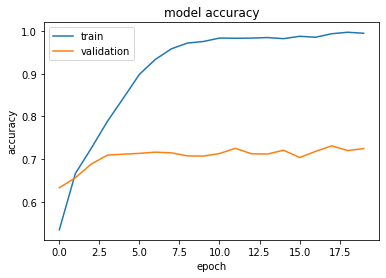

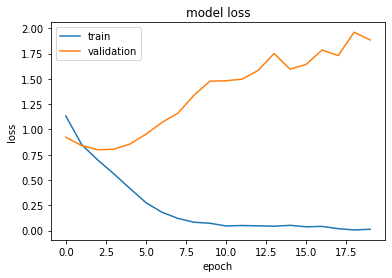

In [20]:
plotLosseAndAccuracy(history)

In [21]:
score = model.evaluate(new_X_test, new_y_test_categorized)

5000/5000 [==============================] - 1s 287us/step


In [22]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.9899007623672484, 0.7154]


In [23]:
prediction = model.predict_classes(new_X_test, batch_size=10, verbose=0)

In [24]:
%matplotlib inline

In [25]:
cm = confusion_matrix(new_y_test_mapped, prediction)

In [26]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
   
    #This function prints and plots the confusion matrix.
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') /cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without Normalization")
        
    print(cm)
    
    
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,"{:,}".format(cm[i,j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    

Confusion Matrix without Normalization
[[757  76  43  33  91]
 [ 88 623 141 127  21]
 [ 49 123 675 120  33]
 [ 35 121 117 707  20]
 [106  29  36  14 815]]


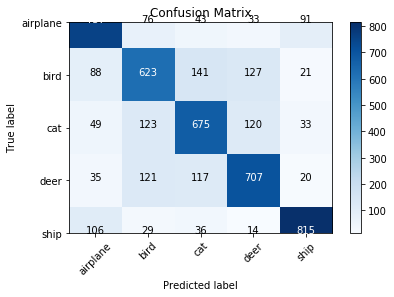

In [27]:
cm_plot_labels =  ['airplane', 'bird', 'cat', 'deer', 'ship'] 
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

---
## Experiment # 2
- ### Regularization (Batch normalization & Dropout)
- ### Epochs = 20, Layers = 2, Batch size = 32,Activation = ReLU, Optimizer = SGD, Learning rate = 0.01
- ### Result: Acc = 73.60% reduced overfitting
---

In [43]:
model_reg = Sequential()

model_reg.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_reg.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model_reg.add(BatchNormalization())
model_reg.add(Activation('relu'))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))
model_reg.add(Dropout(0.25))

model_reg.add(Flatten())
model_reg.add(Dense(256))
# Batch normalization layer added here
model_reg.add(BatchNormalization())
model_reg.add(Activation('relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(5, activation='softmax'))

In [44]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_reg.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [74]:
history_reg = model_reg.fit(X_train_split, y_train_split, epochs=20, batch_size= 32, verbose=2, validation_data = (X_validation, y_validation))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
 - 66s - loss: 1.1860 - acc: 0.5139 - val_loss: 0.9951 - val_acc: 0.6024
Epoch 2/20
 - 66s - loss: 0.9758 - acc: 0.6044 - val_loss: 0.9389 - val_acc: 0.6270
Epoch 3/20
 - 66s - loss: 0.8678 - acc: 0.6615 - val_loss: 0.9593 - val_acc: 0.6258
Epoch 4/20
 - 66s - loss: 0.7819 - acc: 0.6968 - val_loss: 0.9096 - val_acc: 0.6474
Epoch 5/20
 - 68s - loss: 0.7283 - acc: 0.7179 - val_loss: 0.7412 - val_acc: 0.7072
Epoch 6/20
 - 68s - loss: 0.6660 - acc: 0.7432 - val_loss: 0.7421 - val_acc: 0.7080
Epoch 7/20
 - 71s - loss: 0.6087 - acc: 0.7647 - val_loss: 0.7181 - val_acc: 0.7322
Epoch 8/20
 - 66s - loss: 0.5796 - acc: 0.7792 - val_loss: 0.6600 - val_acc: 0.7462
Epoch 9/20
 - 70s - loss: 0.5325 - acc: 0.7960 - val_loss: 0.7521 - val_acc: 0.7028
Epoch 10/20
 - 68s - loss: 0.5061 - acc: 0.8075 - val_loss: 0.6538 - val_acc: 0.7560
Epoch 11/20
 - 66s - loss: 0.4603 - acc: 0.8244 - val_loss: 0.6614 - val_acc: 0.7602
Epoch 12/20
 - 66s - loss

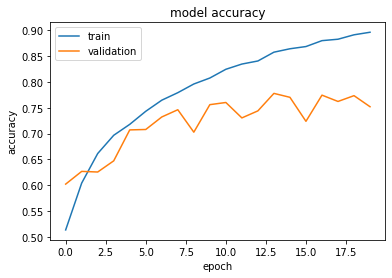

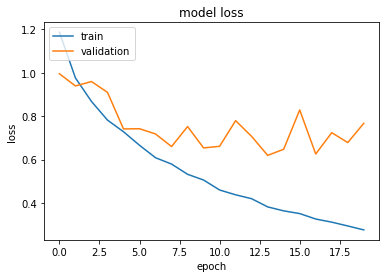

In [75]:
plotLosseAndAccuracy(history_reg)

In [76]:
score_reg = model_reg.evaluate(new_X_test, new_y_test_categorized)

5000/5000 [==============================] - 3s 690us/step


In [77]:
print(model_reg.metrics_names)
print(score_reg)

['loss', 'acc']
[0.7835017153739929, 0.736]


In [39]:
prediction_reg = model_reg.predict_classes(new_X_test, batch_size=10, verbose=0)

In [40]:
cm_reg = confusion_matrix(new_y_test_mapped, prediction_reg)

Confusion Matrix without Normalization
[[766  73  44  21  96]
 [ 52 668 150 117  13]
 [ 18  92 792  76  22]
 [ 19  71 106 791  13]
 [ 47  12  22   8 911]]


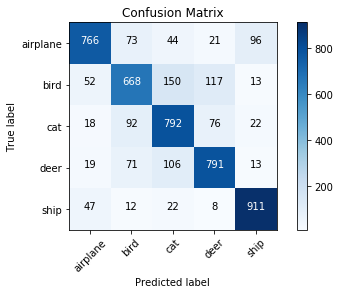

In [41]:
cm_plot_labels =  ['airplane', 'bird', 'cat', 'deer', 'ship'] 
plot_confusion_matrix(cm_reg, cm_plot_labels, title='Confusion Matrix')

---
# Experiment #3
- ### Increased layers with Batch normalization & Dropout
- ### Epochs = 20, Layers = 4, Batch size = 32, Activation = ReLU, Optimizer = Adam
- ### Result: Acc = 76.40% with reduced overfitting
---

In [78]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=X_train_split.shape[1:]))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024,activation='relu'))

cnn_model.add(Dense(units=1024,activation='relu'))

cnn_model.add(Dense(units=5,activation='softmax'))

In [79]:
cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [80]:
history_adam = cnn_model.fit(X_train_split,y_train_split, validation_data=(X_validation,y_validation), epochs=20, verbose = 2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
 - 142s - loss: 1.2095 - acc: 0.4555 - val_loss: 1.0638 - val_acc: 0.5560
Epoch 2/20
 - 142s - loss: 1.0222 - acc: 0.5730 - val_loss: 0.9288 - val_acc: 0.6228
Epoch 3/20
 - 144s - loss: 0.9272 - acc: 0.6243 - val_loss: 0.9486 - val_acc: 0.6122
Epoch 4/20
 - 137s - loss: 0.8637 - acc: 0.6573 - val_loss: 0.7887 - val_acc: 0.6832
Epoch 5/20
 - 132s - loss: 0.7966 - acc: 0.6922 - val_loss: 0.7647 - val_acc: 0.7026
Epoch 6/20
 - 133s - loss: 0.7558 - acc: 0.7062 - val_loss: 0.7384 - val_acc: 0.7128
Epoch 7/20
 - 132s - loss: 0.7038 - acc: 0.7269 - val_loss: 0.6926 - val_acc: 0.7352
Epoch 8/20
 - 133s - loss: 0.6561 - acc: 0.7445 - val_loss: 0.6573 - val_acc: 0.7536
Epoch 9/20
 - 144s - loss: 0.6140 - acc: 0.7659 - val_loss: 0.6571 - val_acc: 0.7552
Epoch 10/20
 - 142s - loss: 0.5815 - acc: 0.7774 - val_loss: 0.6444 - val_acc: 0.7648
Epoch 11/20
 - 140s - loss: 0.5561 - acc: 0.7880 - val_loss: 0.7321 - val_acc: 0.7250
Epoch 12/20
 -

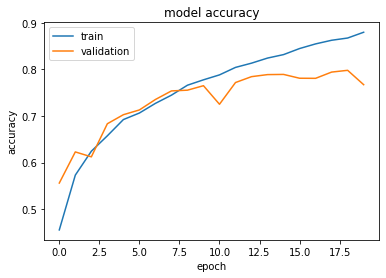

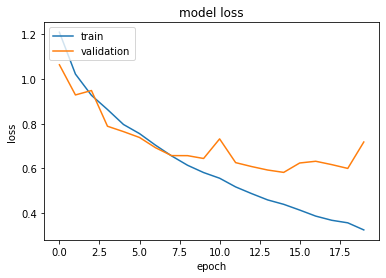

In [81]:
plotLosseAndAccuracy(history_adam)

In [82]:
score_adam = cnn_model.evaluate(new_X_test, new_y_test_categorized)

5000/5000 [==============================] - 5s 1ms/step


In [83]:
print(cnn_model.metrics_names)
print(score_adam)

['loss', 'acc']
[0.745968215417862, 0.764]


In [ ]:
prediction_cnn = cnn_model.predict_classes(new_X_test, batch_size=10, verbose=0)

In [ ]:
cm_cnn = confusion_matrix(new_y_test_mapped, prediction_cnn)

In [ ]:
cm_plot_labels =  ['airplane', 'bird', 'cat', 'deer', 'ship'] 
plot_confusion_matrix(cm_cnn, cm_plot_labels, title='Confusion Matrix')

---
## Experiment # 4
- ### Data Augmentation with Batch normalization and Dropout
- ### Epochs = 20, Layers = 2, Batch size = 32,Activation = ReLU, Optimizer = Adam, Learning rate = 0.0006
- ### Result: Acc = 81.50%
---

In [45]:
#create data generator
train_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_datagen.fit(X_train_split)

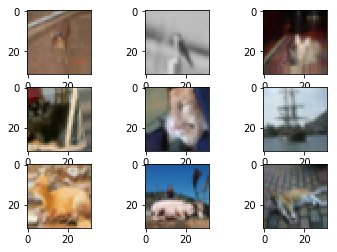

In [65]:


# Configure batch size and retrieve one batch of images
for X_batch, y_batch in train_datagen.flow(X_train_split, y_train_split, batch_size=32):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32,32,3))
    # show the plot
    plt.show()
    break

In [51]:
adam = Adam(lr=0.0006, beta_1=0.9, beta_2=0.999, decay=0.0)
model_reg.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [52]:
history_dataaug = model_reg.fit_generator(train_datagen.flow(X_train_split, y_train_split, batch_size=32),steps_per_epoch=X_train_split.shape[0]//32,epochs=20,verbose=2,validation_data=(X_validation,y_validation))

Epoch 1/20
 - 72s - loss: 0.6160 - acc: 0.7715 - val_loss: 0.6137 - val_acc: 0.7660
Epoch 2/20
 - 74s - loss: 0.6006 - acc: 0.7779 - val_loss: 0.5075 - val_acc: 0.8074
Epoch 3/20
 - 75s - loss: 0.5853 - acc: 0.7819 - val_loss: 0.6175 - val_acc: 0.7650
Epoch 4/20
 - 77s - loss: 0.5858 - acc: 0.7848 - val_loss: 0.5054 - val_acc: 0.8150
Epoch 5/20
 - 78s - loss: 0.5864 - acc: 0.7770 - val_loss: 0.5874 - val_acc: 0.7872
Epoch 6/20
 - 79s - loss: 0.5820 - acc: 0.7869 - val_loss: 0.5125 - val_acc: 0.8120
Epoch 7/20
 - 77s - loss: 0.5765 - acc: 0.7859 - val_loss: 0.4894 - val_acc: 0.8220
Epoch 8/20
 - 79s - loss: 0.5777 - acc: 0.7858 - val_loss: 0.5187 - val_acc: 0.8054
Epoch 9/20
 - 82s - loss: 0.5698 - acc: 0.7889 - val_loss: 0.4981 - val_acc: 0.8130
Epoch 10/20
 - 91s - loss: 0.5694 - acc: 0.7871 - val_loss: 0.4965 - val_acc: 0.8224
Epoch 11/20
 - 82s - loss: 0.5666 - acc: 0.7931 - val_loss: 0.5580 - val_acc: 0.7986
Epoch 12/20
 - 90s - loss: 0.5530 - acc: 0.7983 - val_loss: 0.4882 - val_a

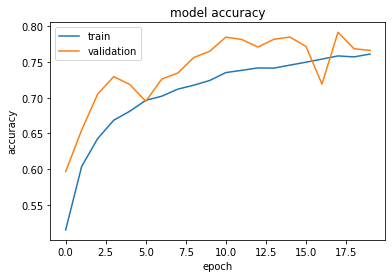

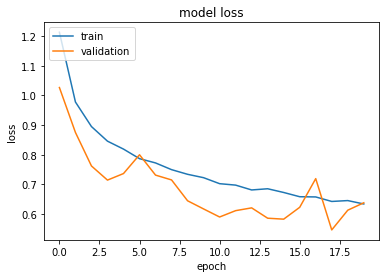

In [48]:
plotLosseAndAccuracy(history_dataaug)

In [53]:
score_dataaug = model_reg.evaluate(new_X_test, new_y_test_categorized)

5000/5000 [==============================] - 5s 1ms/step


In [54]:
print(model_reg.metrics_names)
print(score_dataaug)

['loss', 'acc']
[0.5122221648693085, 0.815]


In [24]:
prediction_dataaug = model_reg.predict_classes(new_X_test, batch_size=10, verbose=0)

In [25]:
cm_dataaug = confusion_matrix(new_y_test_mapped, prediction_dataaug)

Confusion Matrix without Normalization
[[893  41  24  17  25]
 [ 98 677  86 130   9]
 [ 42 100 720 117  21]
 [ 29  76  41 845   9]
 [169  18  19   5 789]]


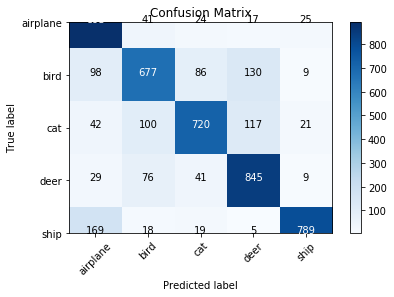

In [26]:
cm_plot_labels =  ['airplane', 'bird', 'cat', 'deer', 'ship'] 
plot_confusion_matrix(cm_dataaug, cm_plot_labels, title='Confusion Matrix')

---
## Experiment # 5
- ### VGG16 with fine tuning
- ### Result: Acc = 82.82%
---

In [28]:
from keras.applications import vgg16 as vgg
vgg16_model = vgg.VGG16(weights='imagenet', include_top=False,input_shape=(48,48,3))

In [29]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [51]:
type(vgg16_model)

keras.engine.training.Model

In [32]:
from keras.engine import Model

In [33]:
# Extract the last layer from third block of vgg16 model
last =vgg16_model.get_layer('block3_pool').output

In [34]:
from keras.layers import GlobalAveragePooling2D
# Add classification layers on top of it
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
pred = Dense(5, activation='softmax')(x)
model = Model(vgg16_model.input, pred)

In [35]:
#Freeze the weights from VGG16
for layer in vgg16_model.layers:
    layer.trainable = False

In [51]:
model.compile(Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [36]:
#Converting type Model to Sequential
model_vgg16 = Sequential()
for layer in model.layers:
     model_vgg16.add(layer)

In [38]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)       295168    
__________

In [44]:
model_vgg16.compile(Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Resize input image to make it compatabile to use VGG16

In [40]:
import scipy as sp
X_train_split = np.array([sp.misc.imresize(x, 
                                     (48,48)) for x in X_train_split])
X_validation = np.array([sp.misc.imresize(x, 
                                   (48,48)) for x in X_validation])
new_X_test = np.array([sp.misc.imresize(x, 
                                    (48,48)) for x in new_X_test])

C:\Users\charu\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\charu\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """
C:\Users\charu\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


In [41]:
history_vgg16 = model_vgg16.fit(X_train_split, y_train_split,epochs=20,verbose=2,validation_data=(X_validation,y_validation))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
 - 152s - loss: 1.1412 - acc: 0.5385 - val_loss: 0.7992 - val_acc: 0.7060
Epoch 2/20
 - 157s - loss: 0.8521 - acc: 0.6701 - val_loss: 0.6934 - val_acc: 0.7432
Epoch 3/20
 - 168s - loss: 0.7511 - acc: 0.7163 - val_loss: 0.6358 - val_acc: 0.7624
Epoch 4/20
 - 171s - loss: 0.6962 - acc: 0.7383 - val_loss: 0.5980 - val_acc: 0.7784
Epoch 5/20
 - 172s - loss: 0.6548 - acc: 0.7530 - val_loss: 0.5686 - val_acc: 0.7946
Epoch 6/20
 - 171s - loss: 0.6180 - acc: 0.7706 - val_loss: 0.5453 - val_acc: 0.7972
Epoch 7/20
 - 175s - loss: 0.5925 - acc: 0.7785 - val_loss: 0.5303 - val_acc: 0.8068
Epoch 8/20
 - 176s - loss: 0.5686 - acc: 0.7890 - val_loss: 0.5159 - val_acc: 0.8116
Epoch 9/20
 - 174s - loss: 0.5433 - acc: 0.7981 - val_loss: 0.5066 - val_acc: 0.8142
Epoch 10/20
 - 176s - loss: 0.5325 - acc: 0.8017 - val_loss: 0.4998 - val_acc: 0.8166
Epoch 11/20
 - 172s - loss: 0.5139 - acc: 0.8083 - val_loss: 0.4887 - val_acc: 0.8220
Epoch 12/20
 -

In [1]:
# import scipy
# scipy.__version__

'1.1.0'

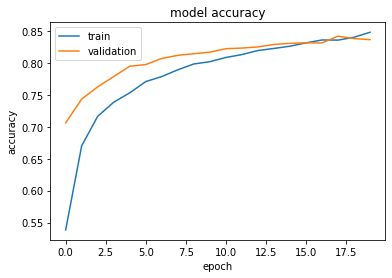

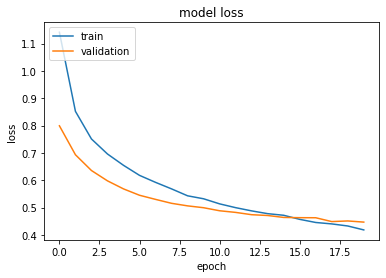

In [42]:
plotLosseAndAccuracy(history_vgg16)

In [45]:
score_vgg16= model_vgg16.evaluate(new_X_test, new_y_test_categorized)

5000/5000 [==============================] - 29s 6ms/step


In [47]:
print(model_vgg16.metrics_names)
print(score_vgg16)

['loss', 'acc']
[0.46418207969665526, 0.8282]


In [48]:
prediction_vgg16 = model_vgg16.predict_classes(new_X_test, batch_size=10, verbose=0)

In [49]:
cm_vgg16 = confusion_matrix(new_y_test_mapped, prediction_vgg16)

Confusion Matrix without Normalization
[[854  28  20  11  87]
 [ 54 757  79  93  17]
 [ 23  86 802  74  15]
 [ 14  82  65 827  12]
 [ 65   9  16   9 901]]


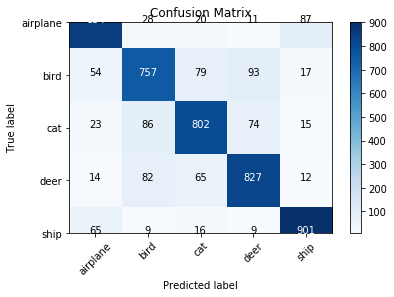

In [50]:
cm_plot_labels =  ['airplane', 'bird', 'cat', 'deer', 'ship'] 
plot_confusion_matrix(cm_vgg16, cm_plot_labels, title='Confusion Matrix')

In [51]:
label_dict = {0:'airplane',
             1:'bird',
             2:'cat',
             3:'deer',
             4:'ship'}
             

In [52]:
def make_prediction(model=None,img_vector=[],
                    label_dict={},top_N=3, 
                    model_input_shape=None):
    if model:
        # get model input shape
        if not model_input_shape:
            model_input_shape = (1,)+model.get_input_shape_at(0)[1:]
            
        # get prediction
        prediction = model.predict(img_vector.reshape(model_input_shape))[0]
        
        
        # get top N with confidence
        labels_predicted = [label_dict[idx] for idx in np.argsort(prediction)[::-1][:top_N]]
        confidence_predicted = np.sort(prediction)[::-1][:top_N]
        
        return labels_predicted, confidence_predicted

In [53]:
def plot_predictions(model,dataset,
                    dataset_labels,label_dict,
                    batch_size,grid_height,grid_width):
    if model:
        f, ax = plt.subplots(grid_width, grid_height)
        f.set_size_inches(12, 12)
        
        random_batch_indx = np.random.permutation(np.arange(0,len(dataset)))[:batch_size]

        img_idx = 0
        for i in range(0, grid_width):
            for j in range(0, grid_height):
                actual_label = label_dict.get(dataset_labels[random_batch_indx[img_idx]].argmax())
                preds,confs_ = make_prediction(model,
                                              img_vector=dataset[random_batch_indx[img_idx]],
                                              label_dict=label_dict,
                                              top_N=1)
                ax[i][j].axis('off')
                ax[i][j].set_title('Actual:'+actual_label[:10]+\
                                    '\nPredicted:'+preds[0] + \
                                    '(' +str(round(confs_[0],2)) + ')')
                ax[i][j].imshow(dataset[random_batch_indx[img_idx]])
                img_idx += 1

        plt.subplots_adjust(left=0, bottom=0, right=1, 
                            top=1, wspace=0.4, hspace=0.55)


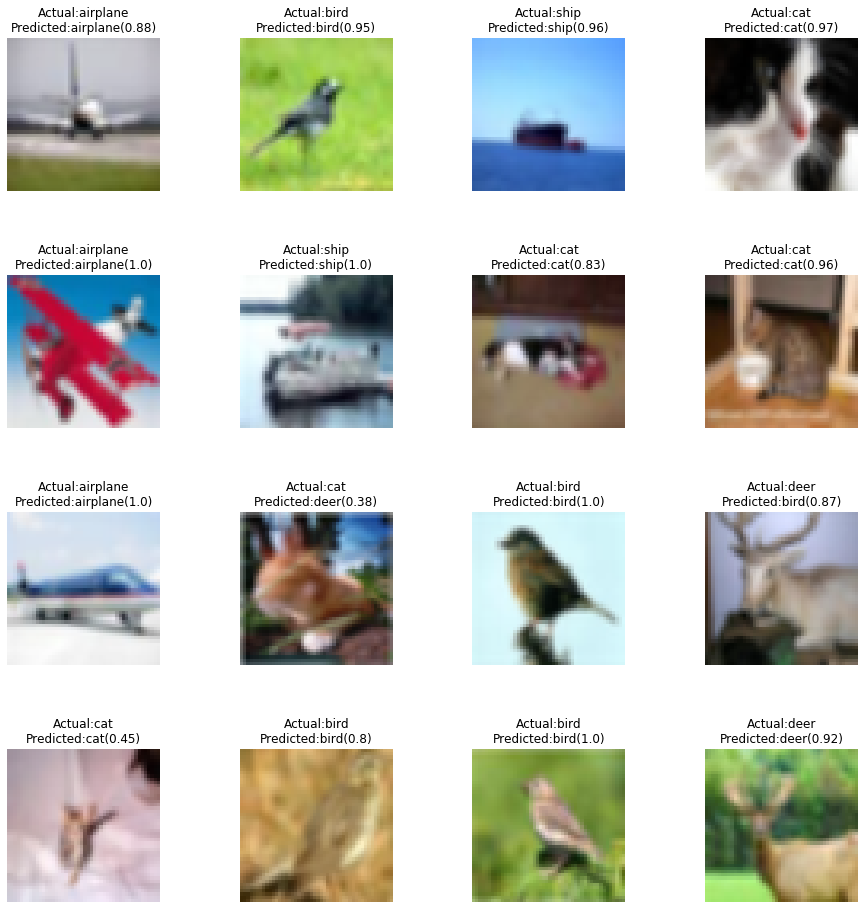

In [60]:
plot_predictions(model=model_vgg16,dataset=new_X_test,
                       dataset_labels=new_y_test_categorized,
                       label_dict=label_dict,
                       batch_size=16,
                       grid_height=4,
                       grid_width=4)